In [1]:
import emcee

In [2]:
# Choose the "true" parameters.
m_true = -0.9594
b_true = 4.294
f_true = 0.534

# Generate some synthetic data from the model.
N = 50
x = np.sort(10*np.random.rand(N))
yerr = 0.1+0.5*np.random.rand(N)
y = m_true*x+b_true
y += np.abs(f_true*y) * np.random.randn(N)
y += yerr * np.random.randn(N)

In [7]:
throw_dim=2# throw away first 2 points

In [8]:
def lnlike(theta, x, y, yerr):#throw away points
    m, b, lnf = theta
    model = m * x[throw_dim:] + b
    inv_sigma2 = 1.0/(yerr[throw_dim:]**2 + model**2*np.exp(2*lnf))
    return -0.5*(np.sum((y[throw_dim:]-model)**2*inv_sigma2 - np.log(inv_sigma2)))

def lnlike2(theta, x, y, yerr):#marginalize over points
    m, b, lnf = theta[:3]
    ythrow= theta[3:]
    model = m * x[throw_dim:] + b
    model=np.append(ythrow,model)
    inv_sigma2 = 1.0/(yerr**2 + model**2*np.exp(2*lnf))
    return -0.5*(np.sum((y-model)**2*inv_sigma2 - np.log(inv_sigma2)))

In [9]:
ndim, nwalkers = 3, 100
pos0 = [[m_true,b_true,f_true] + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]

ndim2= 3+throw_dim
pos2 = [np.append([m_true,b_true,f_true],x[:throw_dim]) + 1e-4*np.random.randn(ndim2) for i in range(nwalkers)]

In [10]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnlike, args=(x, y, yerr))

In [25]:
burn=50
nstep=500
thin=2

In [26]:
pos, prob, state =sampler.run_mcmc(pos0,burn,storechain=0)
sampler.reset()
pos, prob, state =sampler.run_mcmc(pos,nstep,thin=thin)
chain=sampler.flatchain#.reshape((-1, ndim))

In [27]:
sampler2 = emcee.EnsembleSampler(nwalkers, ndim2, lnlike2, args=(x, y, yerr))
pos2, prob2, state2 =sampler2.run_mcmc(pos2,burn,storechain=0)
sampler2.reset()
pos2, prob2, state2 =sampler2.run_mcmc(pos2,nstep,thin=thin)
chain2=sampler2.flatchain#.reshape((-1, ndim))

In [28]:
chain.shape,chain2.shape

((25000, 3), (25000, 5))

In [29]:
cov=np.cov(chain,rowvar=0)
cov2=np.cov(chain2[:,:3],rowvar=0)

In [30]:
eig_v,eig_vec=np.linalg.eig(cov)
eig_v2,eig_vec2=np.linalg.eig(cov2)

In [31]:
eig_v,eig_v2

(array([ 0.16667044,  0.00028052,  0.01791589]),
 array([ 0.18748079,  0.00141624,  0.03932537]))

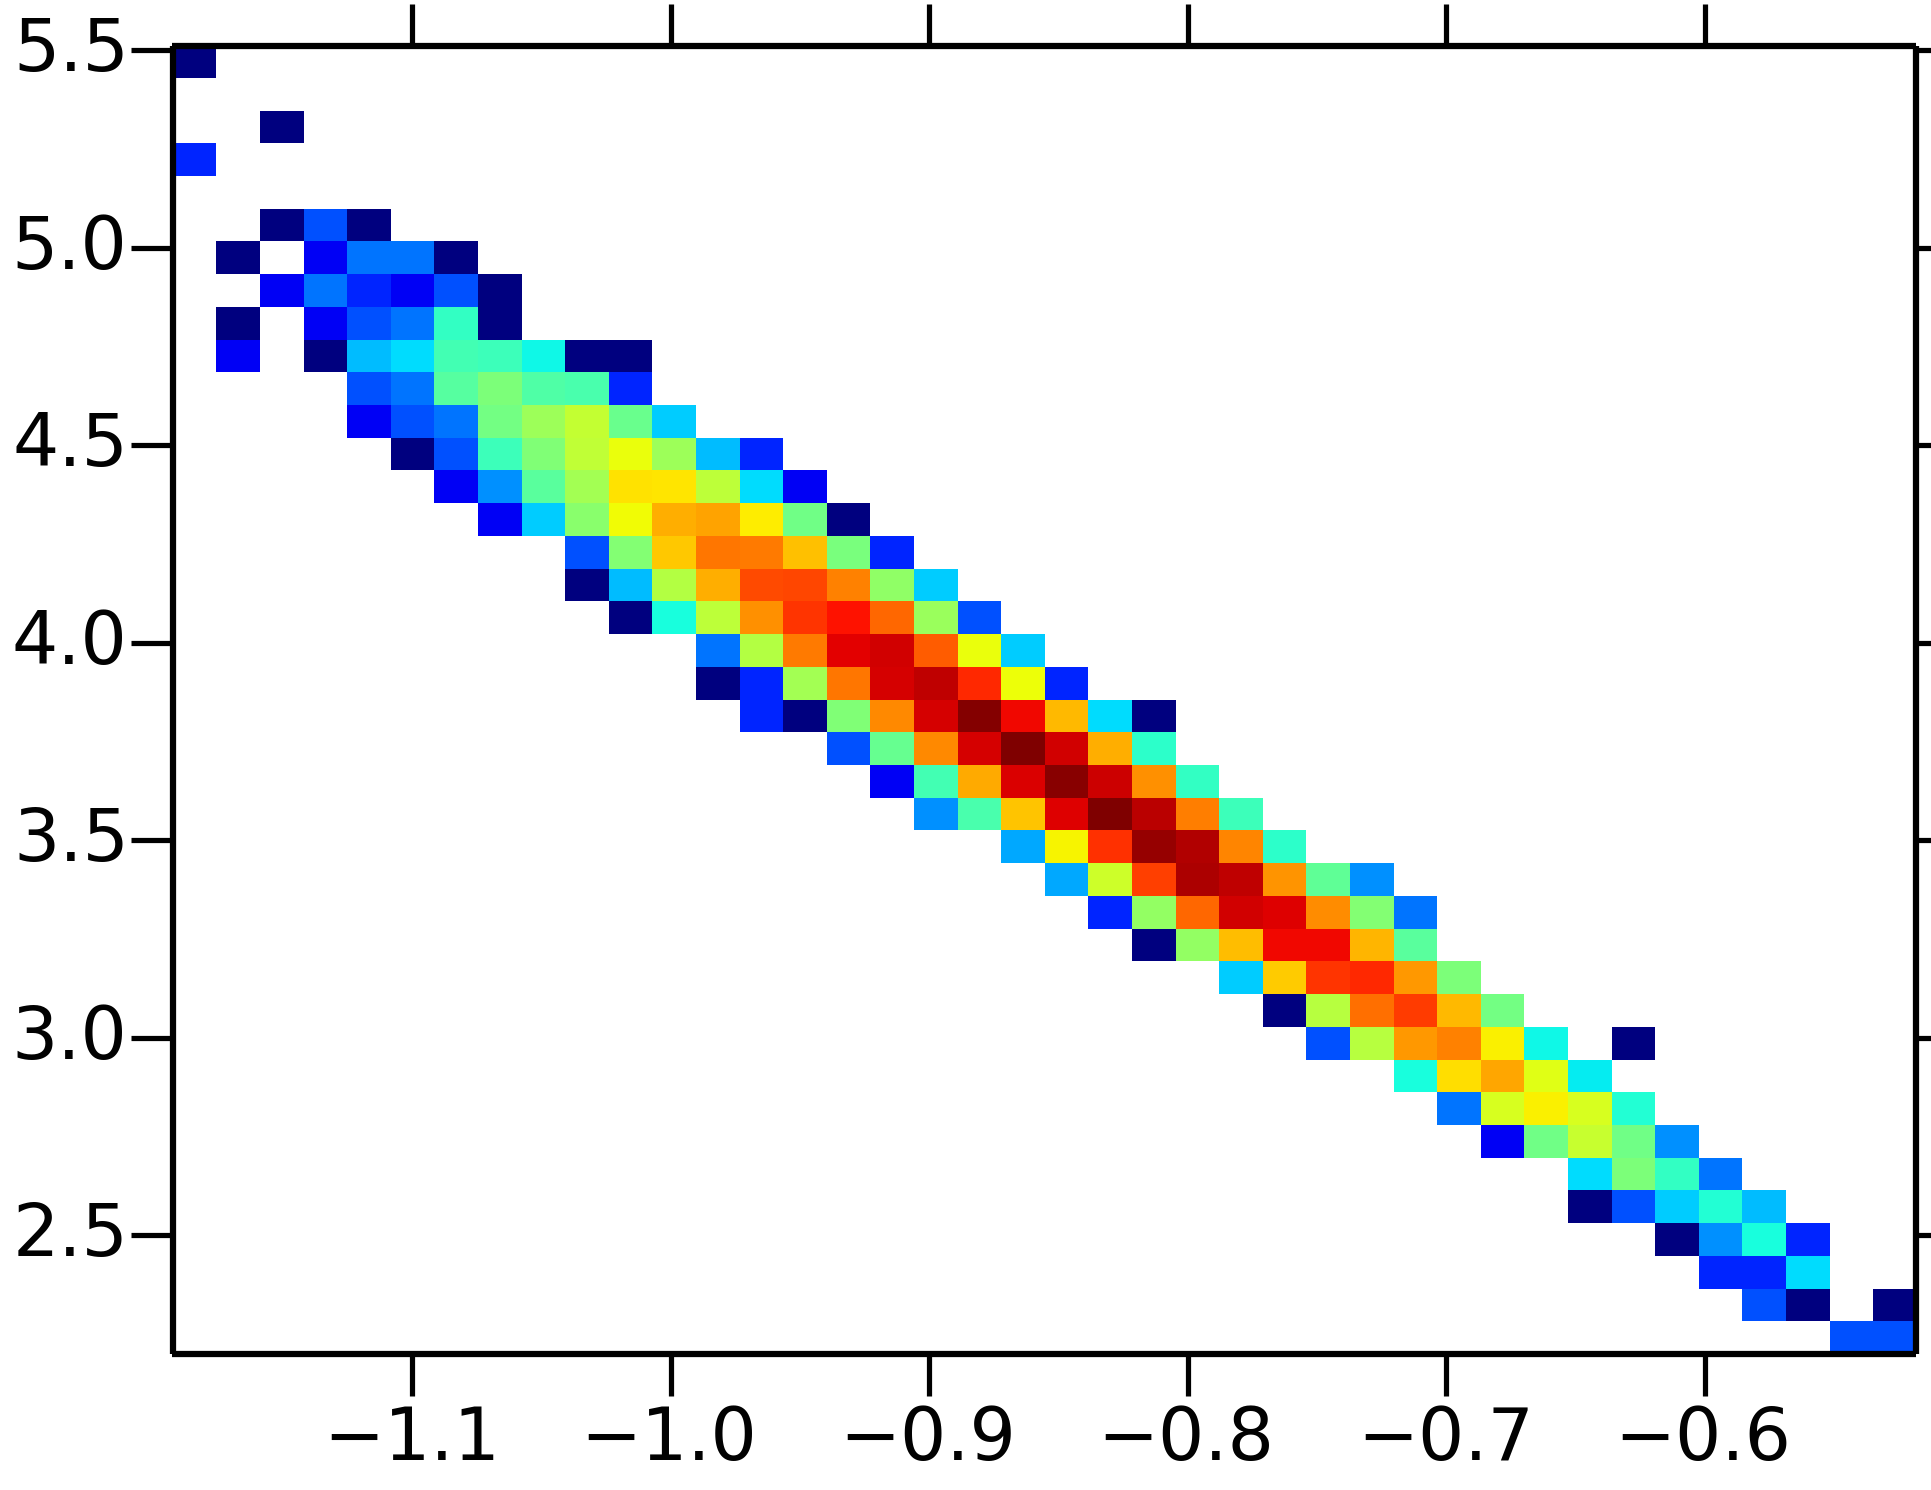

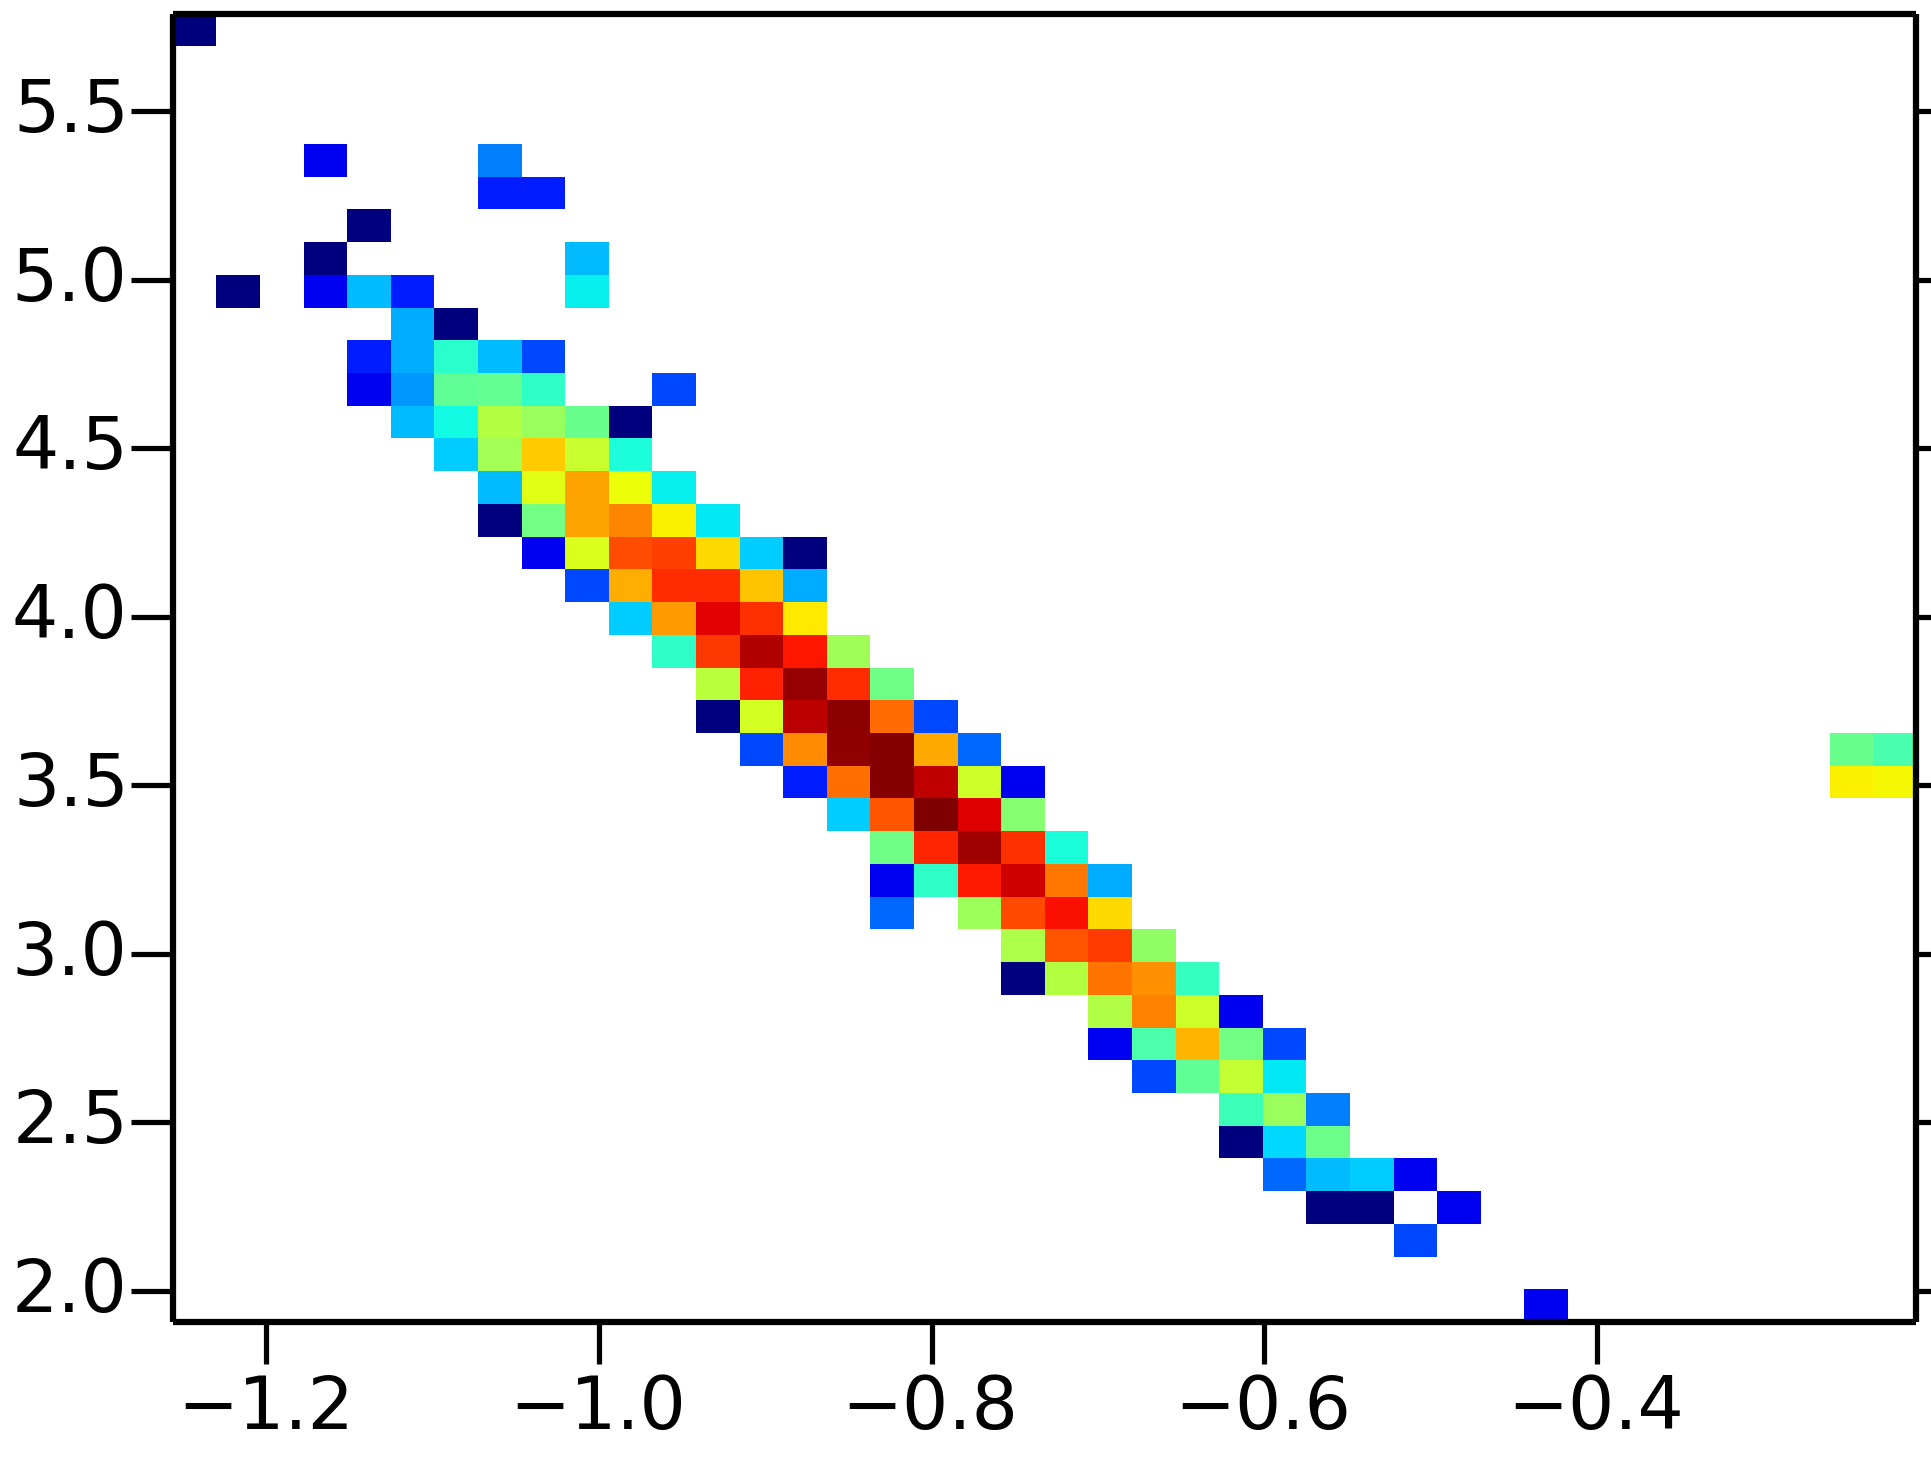

In [32]:
chain=sampler.flatchain
a=hist2d(chain[:,0],chain[:,1],40,norm=LogNorm())
show()
a=hist2d(chain2[:,0],chain2[:,1],40,norm=LogNorm())

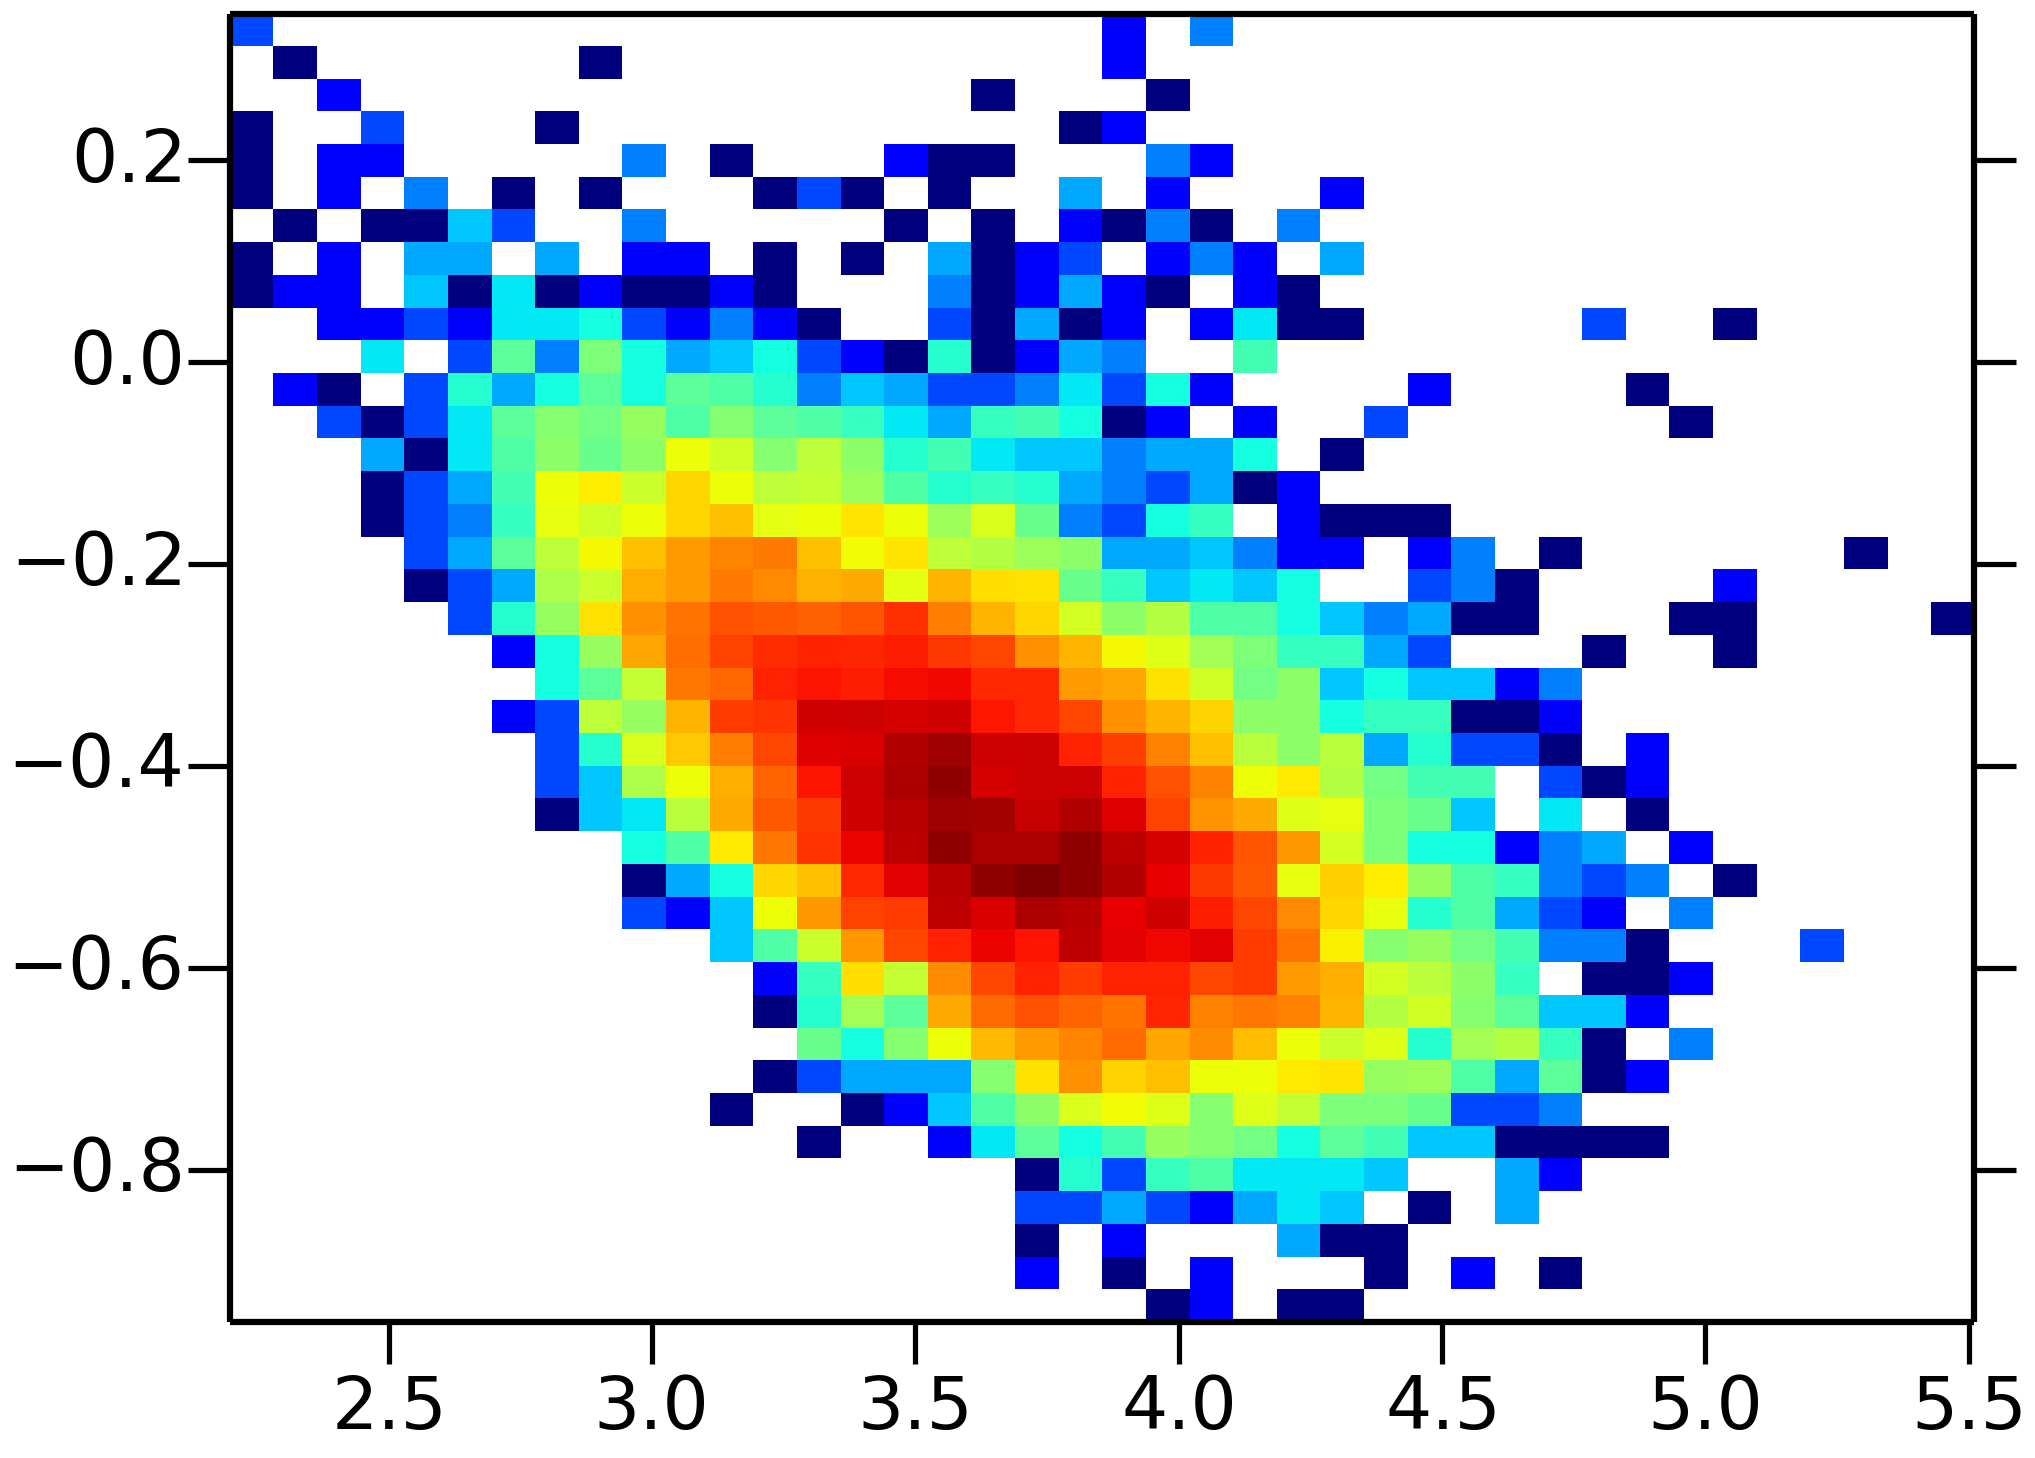

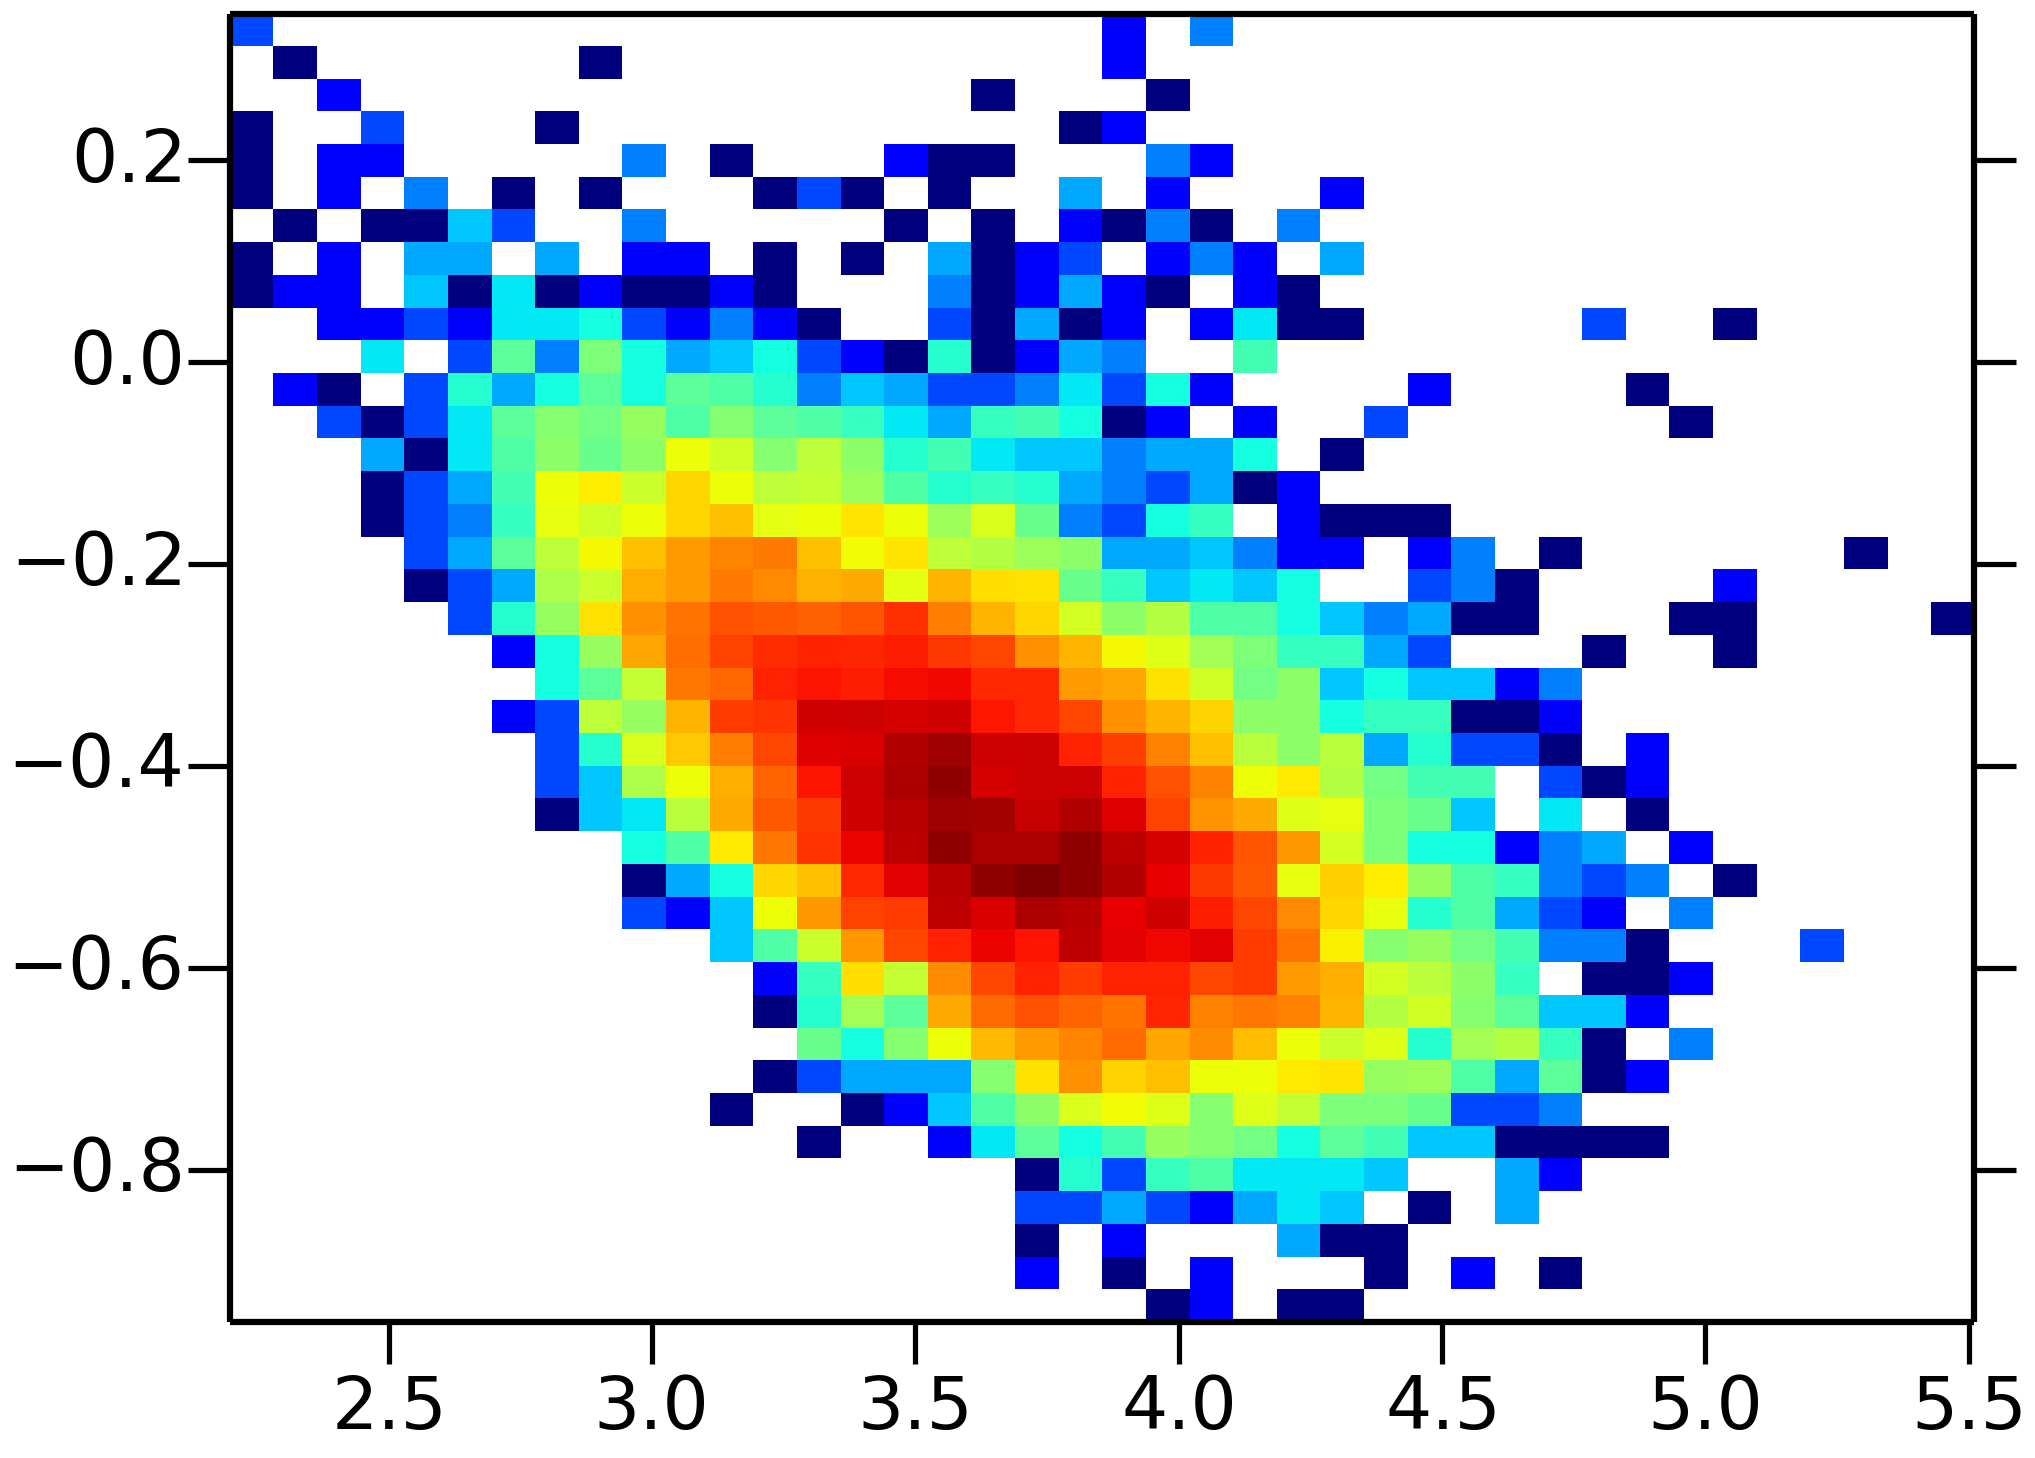

In [33]:
chain=sampler.flatchain
a=hist2d(chain[:,1],chain[:,2],40,norm=LogNorm())
show()
a=hist2d(chain[:,1],chain[:,2],40,norm=LogNorm())

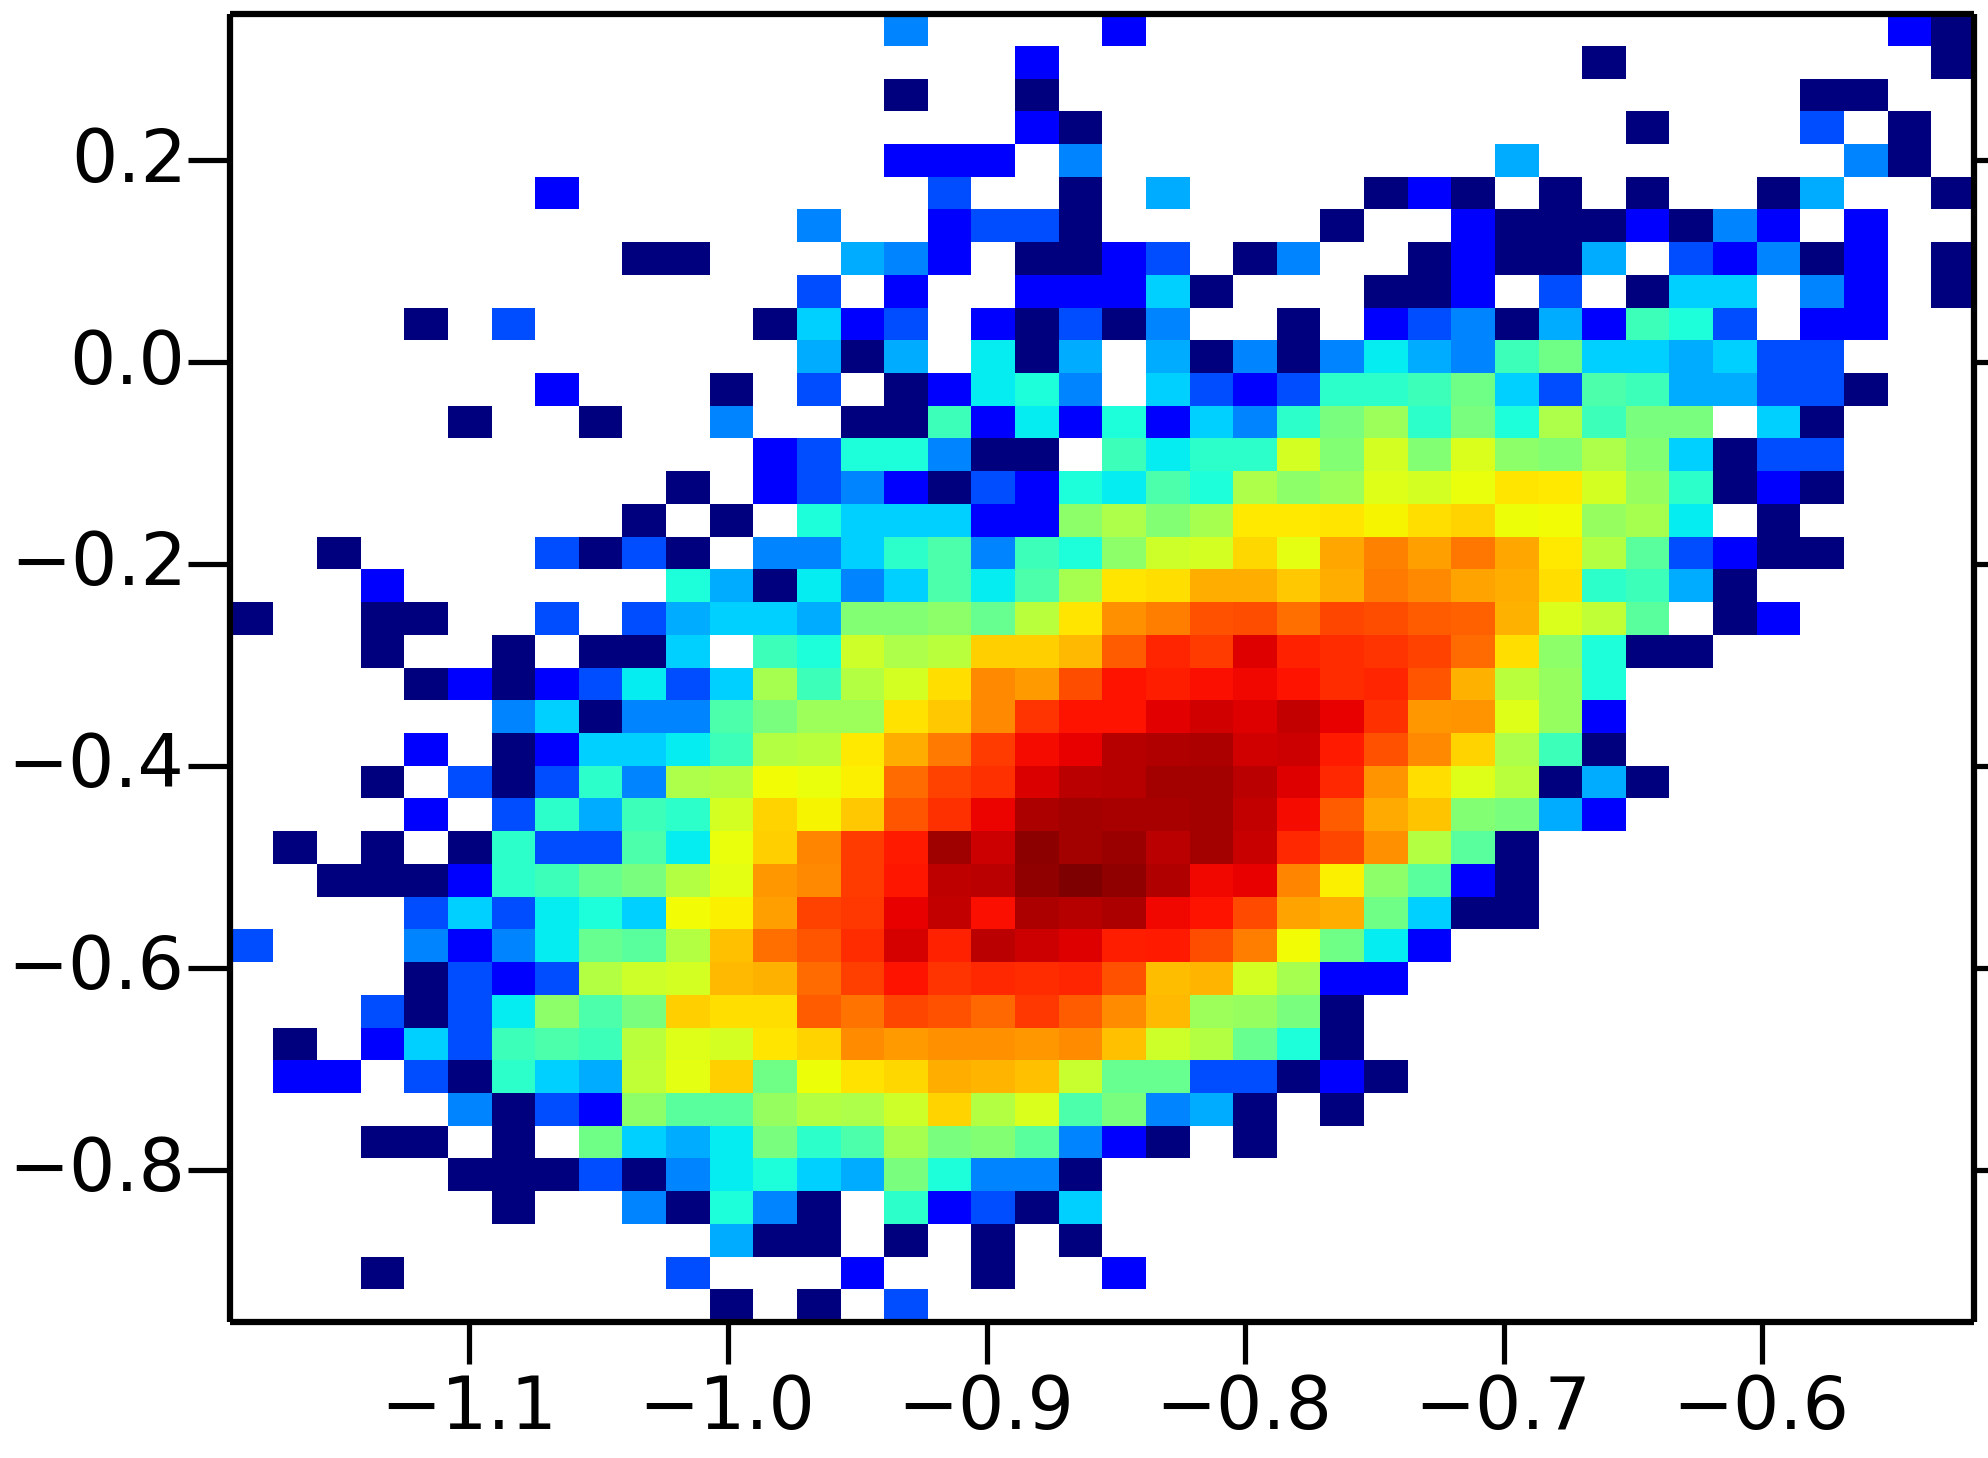

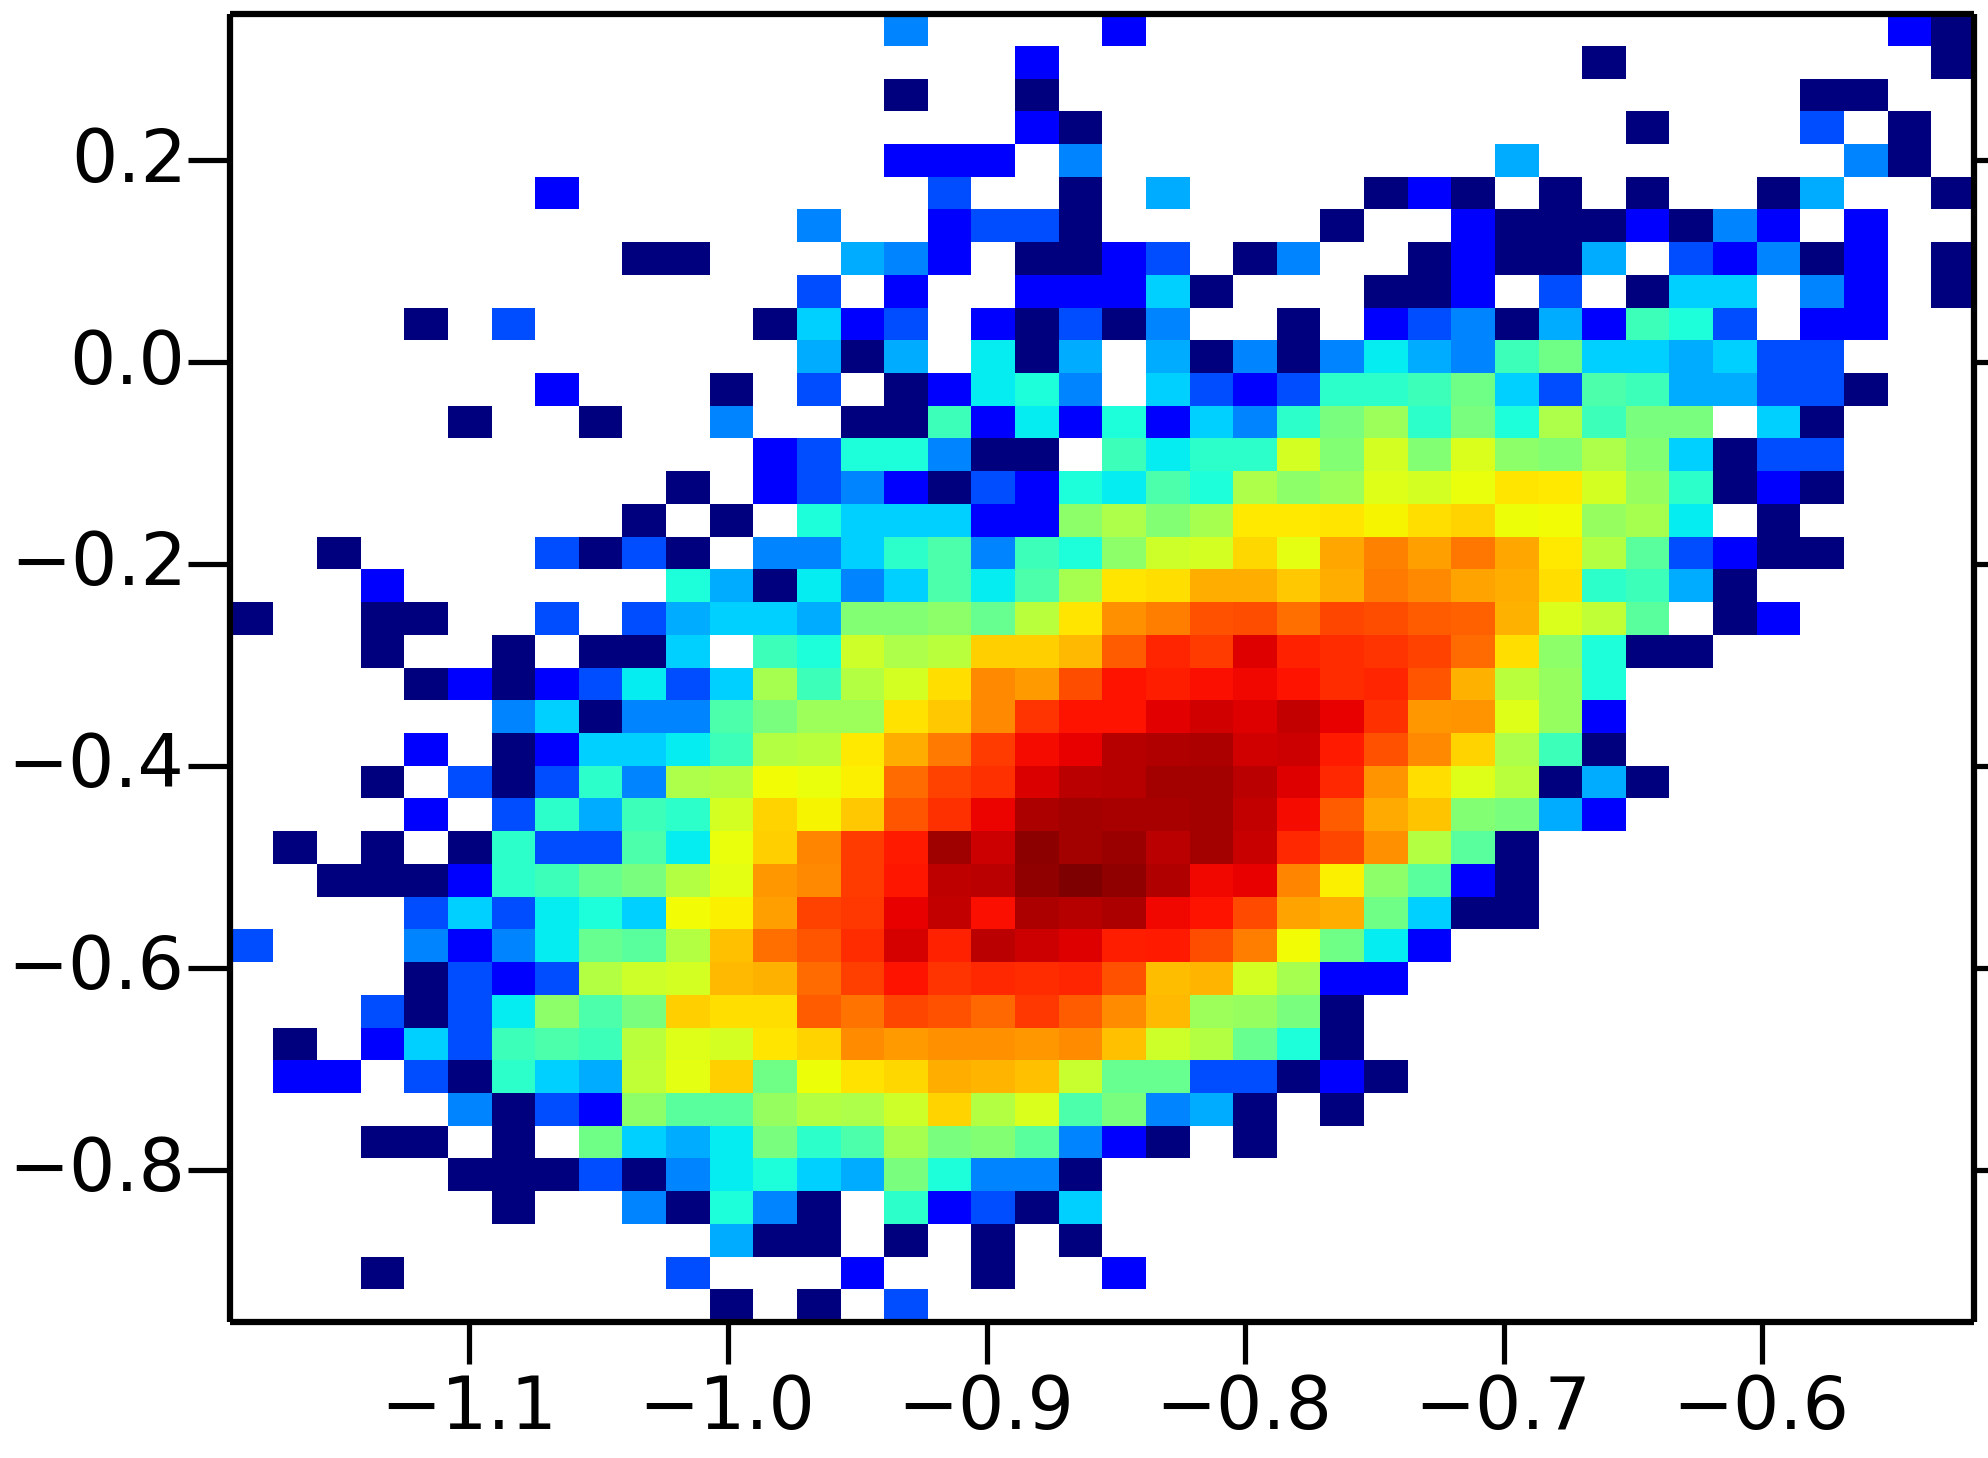

In [34]:
chain=sampler.flatchain
a=hist2d(chain[:,0],chain[:,2],40,norm=LogNorm())
show()
a=hist2d(chain[:,0],chain[:,2],40,norm=LogNorm())